In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv("/content/water_potability(1).csv", encoding = "latin-1")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,NaN,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,NaN,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668101687,193.6817355,47580.9916,7.166638935,359.948574,526.4241709,13.89441852,66.68769479,4.43582091,1
3272,7.808856018,193.5532116,17329.80216,8.061361988,NaN,392.4495796,19.90322518,NaN,2.798242842,1
3273,9.419510316,175.7626463,33155.57822,7.350233233,NaN,432.044783,11.03906969,69.84540029,3.298875499,1
3274,5.126762923,230.6037575,11983.86938,6.303356534,NaN,402.8831131,11.16894622,77.4882131,4.708658468,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   object 
 1   Hardness         3276 non-null   object 
 2   Solids           3276 non-null   object 
 3   Chloramines      3276 non-null   object 
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   object 
 6   Organic_carbon   3276 non-null   object 
 7   Trihalomethanes  3114 non-null   object 
 8   Turbidity        3276 non-null   object 
 9   Potability       3276 non-null   int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 256.1+ KB


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
df2 = df.fillna(method = "pad")

In [6]:
df2.isnull().sum()

ph                 1
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
df2["ph"] = df2["ph"].fillna(df["ph"].mode())

In [8]:
df2.describe()

,Sulfate,Potability
count,3276.000000,3276.000000
mean,333.946231,0.103175
std,41.261830,0.304233
min,129.000000,0.000000
25%,307.652451,0.000000
50%,333.076588,0.000000
75%,360.173793,0.000000
max,481.030642,1.000000


In [9]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,0,204.8904555,20791.31898,7.300211873,368.516441,564.3086542,10.37978308,86.99097046,2.963135381,0
1,3.716080075,129.4229205,18630.05786,6.635245884,368.516441,592.8853591,15.18001312,56.32907628,4.500656275,0
2,8.099124189,224.2362594,19909.54173,9.275883603,368.516441,418.6062131,16.86863693,66.42009251,3.05593375,0
3,8.316765884,214.3733941,22018.41744,8.059332377,356.886136,363.2665162,18.4365245,100.3416744,4.628770537,0
4,9.092223456,181.1015092,17978.98634,6.546599974,310.135738,398.4108134,11.55827944,31.99799273,4.075075425,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668101687,193.6817355,47580.9916,7.166638935,359.948574,526.4241709,13.89441852,66.68769479,4.43582091,1
3272,7.808856018,193.5532116,17329.80216,8.061361988,359.948574,392.4495796,19.90322518,66.68769479,2.798242842,1
3273,9.419510316,175.7626463,33155.57822,7.350233233,359.948574,432.044783,11.03906969,69.84540029,3.298875499,1
3274,5.126762923,230.6037575,11983.86938,6.303356534,359.948574,402.8831131,11.16894622,77.4882131,4.708658468,1


In [10]:
df2["ph"] = df2["ph"].apply(lambda x:re.findall(r"\d+.[\d]{2}",x)[:1])

In [11]:
df2["ph"] = df2["ph"].str[0].astype(float)

In [12]:
df2["Hardness"] = df2["Hardness"].apply(lambda x:re.findall(r"\d+.[\d]{2}",x)[:1])

In [13]:
df2["Hardness"] = df2["Hardness"].str[0].astype(float)

In [14]:
df2["Solids"] = df2["Solids"].apply(lambda x:re.findall(r"[\d]{5}.[\d]{2}",x)[:1])

In [15]:
df2["Solids"]

0       [20791.31]
1       [18630.05]
2       [19909.54]
3       [22018.41]
4       [17978.98]
           ...    
3271    [47580.99]
3272    [17329.80]
3273    [33155.57]
3274    [11983.86]
3275    [17404.17]
Name: Solids, Length: 3276, dtype: object

In [16]:
df2["Solids"] = df2["Solids"].str[0].astype(float)

In [17]:
df2["Chloramines"] = df2["Chloramines"].apply(lambda x:re.findall(r"\d+.[\d]{2}",x)[:1])

In [18]:
df2["Chloramines"] = df2["Chloramines"].str[0].astype(float)

In [19]:
df2["Conductivity"] = df2["Conductivity"].apply(lambda x:re.findall(r"\d+.[\d]{2}",x)[:1])

In [20]:
df2["Conductivity"] = df2["Conductivity"].str[0].astype(float)

In [21]:
df2["Organic_carbon"] = df2["Organic_carbon"].apply(lambda x: re.findall(r"\d+.[\d]{2}",x)[:1])

In [22]:
df2["Organic_carbon"] = df2["Organic_carbon"].str[0].astype(float)

In [23]:
df2["Trihalomethanes"]= df2["Trihalomethanes"].apply(lambda x : re.findall(r"\d+.[\d]{2}",x)[:1])

In [24]:
df2["Trihalomethanes"]

0        [86.99]
1        [56.32]
2        [66.42]
3       [100.34]
4        [31.99]
          ...   
3271     [66.68]
3272     [66.68]
3273     [69.84]
3274     [77.48]
3275     [78.69]
Name: Trihalomethanes, Length: 3276, dtype: object

In [25]:
df2["Trihalomethanes"] = df2["Trihalomethanes"].str[0].astype(float)

In [26]:
df2["Turbidity"] = df2["Turbidity"].apply(lambda x: re.findall(r"\d+.[\d]{2}",x)[:1])

In [27]:
df2["Turbidity"]= df2["Turbidity"].str[0].astype(float)

In [28]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.89,20791.31,7.30,368.516441,564.30,10.37,86.99,2.96,0
1,3.71,129.42,18630.05,6.63,368.516441,592.88,15.18,56.32,4.50,0
2,8.09,224.23,19909.54,9.27,368.516441,418.60,16.86,66.42,3.05,0
3,8.31,214.37,22018.41,8.05,356.886136,363.26,18.43,100.34,4.62,0
4,9.09,181.10,17978.98,6.54,310.135738,398.41,11.55,31.99,4.07,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.66,193.68,47580.99,7.16,359.948574,526.42,13.89,66.68,4.43,1
3272,7.80,193.55,17329.80,8.06,359.948574,392.44,19.90,66.68,2.79,1
3273,9.41,175.76,33155.57,7.35,359.948574,432.04,11.03,69.84,3.29,1
3274,5.12,230.60,11983.86,6.30,359.948574,402.88,11.16,77.48,4.70,1


In [29]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3273 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3065 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3274 non-null   float64
 7   Trihalomethanes  3275 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [30]:
df2.isnull().sum()

ph                   3
Hardness             0
Solids             211
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       2
Trihalomethanes      1
Turbidity            0
Potability           0
dtype: int64

In [31]:
df2 = df2.fillna(method = "bfill")

In [32]:
df2

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.71,204.89,20791.31,7.30,368.516441,564.30,10.37,86.99,2.96,0
1,3.71,129.42,18630.05,6.63,368.516441,592.88,15.18,56.32,4.50,0
2,8.09,224.23,19909.54,9.27,368.516441,418.60,16.86,66.42,3.05,0
3,8.31,214.37,22018.41,8.05,356.886136,363.26,18.43,100.34,4.62,0
4,9.09,181.10,17978.98,6.54,310.135738,398.41,11.55,31.99,4.07,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.66,193.68,47580.99,7.16,359.948574,526.42,13.89,66.68,4.43,1
3272,7.80,193.55,17329.80,8.06,359.948574,392.44,19.90,66.68,2.79,1
3273,9.41,175.76,33155.57,7.35,359.948574,432.04,11.03,69.84,3.29,1
3274,5.12,230.60,11983.86,6.30,359.948574,402.88,11.16,77.48,4.70,1


In [33]:
df2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [34]:
df2["ph"] = df2["ph"].fillna(df2["ph"].mode())

In [35]:
df2.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [36]:
df2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3.276000e+03,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,4.898973e+04,196.303443,22985.487121,10.182024,333.946231,426.041371,49.820757,66.405238,3.961819,0.103175
std,2.803589e+06,33.040451,8297.029731,175.418963,41.261830,81.142570,1656.068247,16.176329,0.780356,0.304233
min,2.200000e-01,9.600000,10039.530000,0.350000,129.000000,3.670000,4.370000,0.730000,1.450000,0.000000
25%,6.080000e+00,176.830000,16653.025000,6.120000,307.652451,365.710000,12.060000,55.897500,3.430000,0.000000
50%,7.030000e+00,196.925000,21670.575000,7.130000,333.076588,421.765000,14.215000,66.660000,3.950000,0.000000
75%,8.060000e+00,216.662500,27849.877500,8.110000,360.173793,481.740000,16.552500,77.370000,4.500000,0.000000
max,1.604672e+08,323.120000,61227.190000,10047.050000,481.030642,753.340000,91456.650000,120.030000,6.730000,1.000000


In [ ]:
#Detection and Removal of Outliers

**1.Ph**

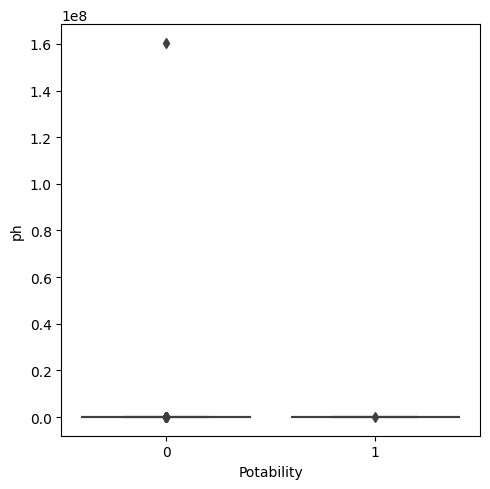

In [37]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "ph")
plt.tight_layout()

In [38]:
df2["ph"].min()

0.22

In [39]:
df2["ph"]=df2["ph"].replace(df2["ph"].max(), 0)

In [40]:
df2["ph"].max()

13.54

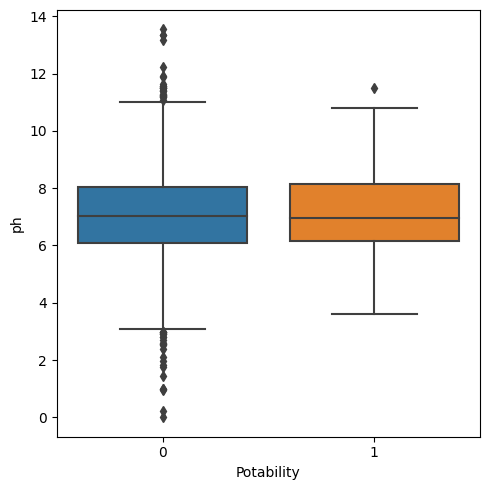

In [41]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "ph")
plt.tight_layout()

**Hardness**

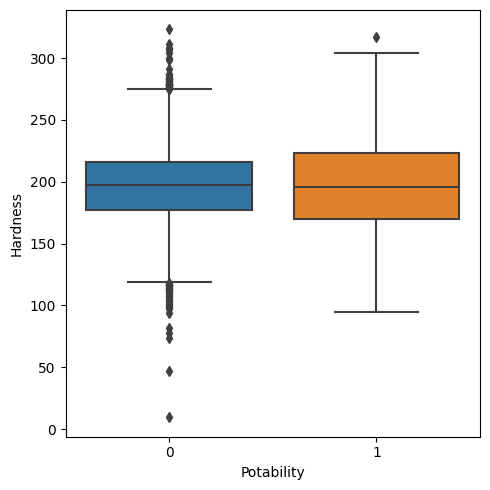

In [42]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Hardness")
plt.tight_layout()


**Solids**

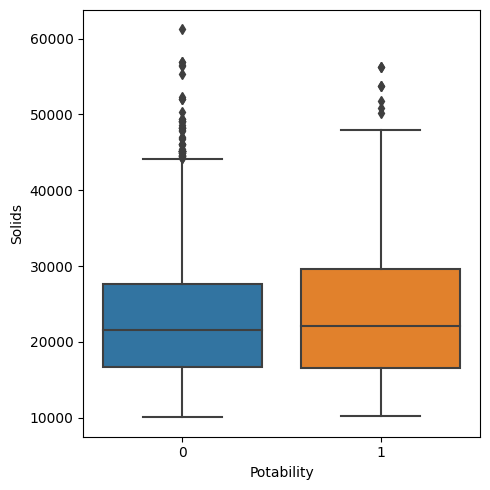

In [43]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Solids")
plt.tight_layout()

**Chloramines**

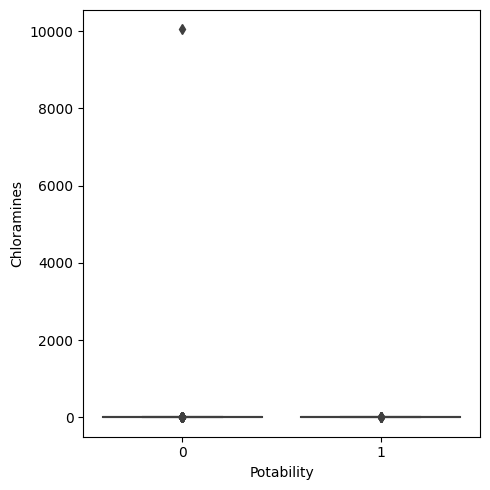

In [44]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Chloramines")
plt.tight_layout()

In [45]:
Q1 = df2['Chloramines'].quantile(0.25)
Q3 = df2['Chloramines'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df2['Chloramines']>=upper)[0]
lower_array = np.where(df2['Chloramines']<=lower)[0]

# Removing the outliers
df2.drop(index=upper_array, inplace=True)
df2.drop(index=lower_array, inplace=True)

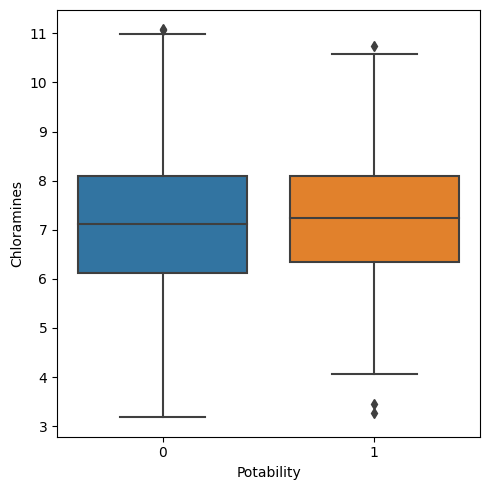

In [46]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Chloramines")
plt.tight_layout()

**Sulfate**

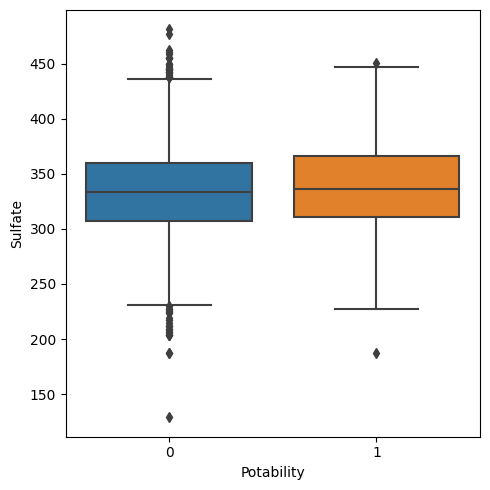

In [47]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Sulfate")
plt.tight_layout()

**Conductivity**

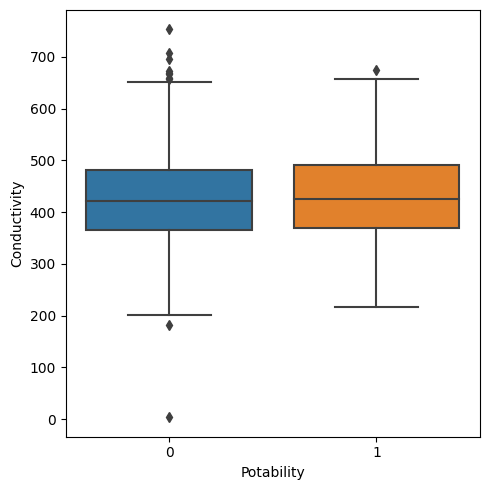

In [48]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Conductivity")
plt.tight_layout()

In [49]:
df2["Conductivity"] = df2["Conductivity"].replace(df2["Conductivity"].min(), 150)

**Organic_carbon**

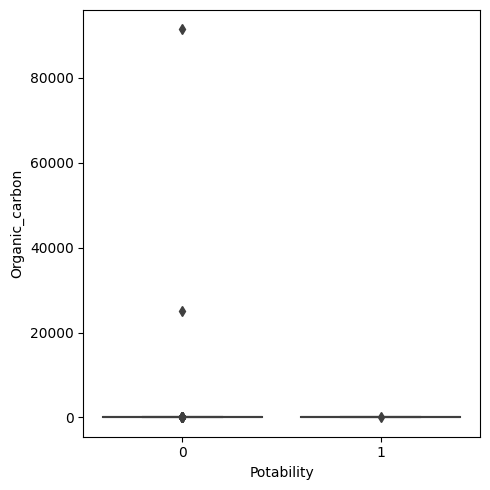

In [50]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Organic_carbon")
plt.tight_layout()

In [51]:
Q1 = df2['Organic_carbon'].quantile(0.25)
Q3 = df2['Organic_carbon'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df2['Organic_carbon']>=upper)[0]
lower_array = np.where(df2['Organic_carbon']<=lower)[0]

# Removing the outliers
df2.drop(index=upper_array, inplace=True)
df2.drop(index=lower_array, inplace=True)


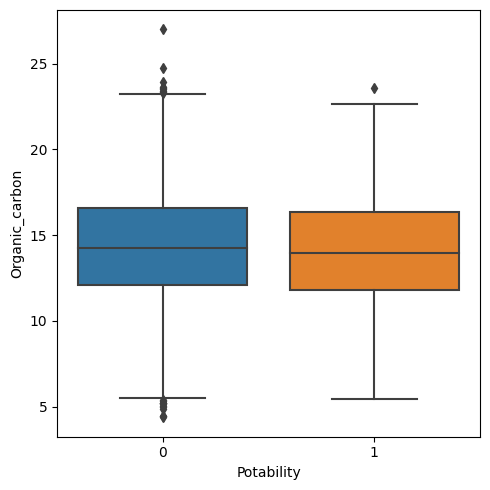

In [52]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Organic_carbon")
plt.tight_layout()

**Trihalomethanes**

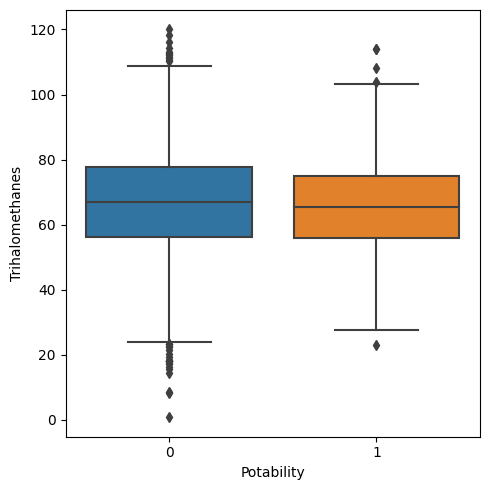

In [53]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Trihalomethanes")
plt.tight_layout()

In [54]:
Q1 = df2['Trihalomethanes'].quantile(0.25)
Q3 = df2['Trihalomethanes'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df2['Trihalomethanes']>=upper)[0]
lower_array = np.where(df2['Trihalomethanes']<=lower)[0]

# Removing the outliers
df2.drop(index=upper_array, inplace=True)
df2.drop(index=lower_array, inplace=True)

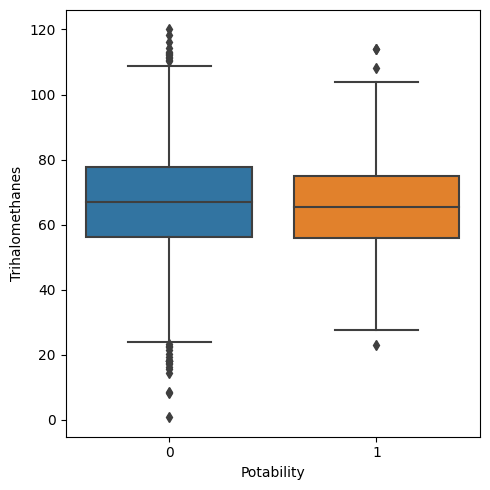

In [55]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Trihalomethanes")
plt.tight_layout()

In [56]:
df2["Trihalomethanes"].min()

0.73

In [57]:
df2["Trihalomethanes"] = df2["Trihalomethanes"].replace(df2["Trihalomethanes"].min(), 15)

**Turbidity**

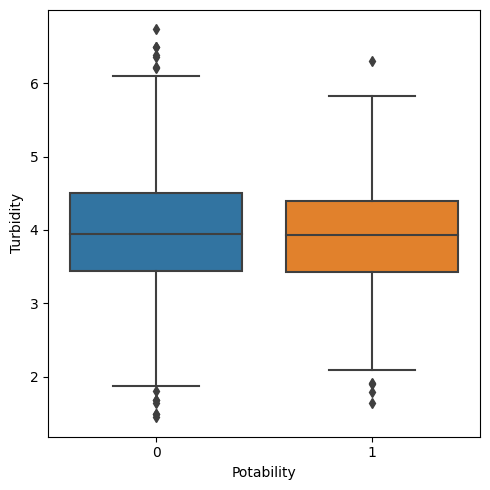

In [58]:
plt.figure(figsize = (5,5))
sns.boxplot(data = df2, x = "Potability", y= "Turbidity")
plt.tight_layout()

In [ ]:
#Feature Analysis with Target Variable

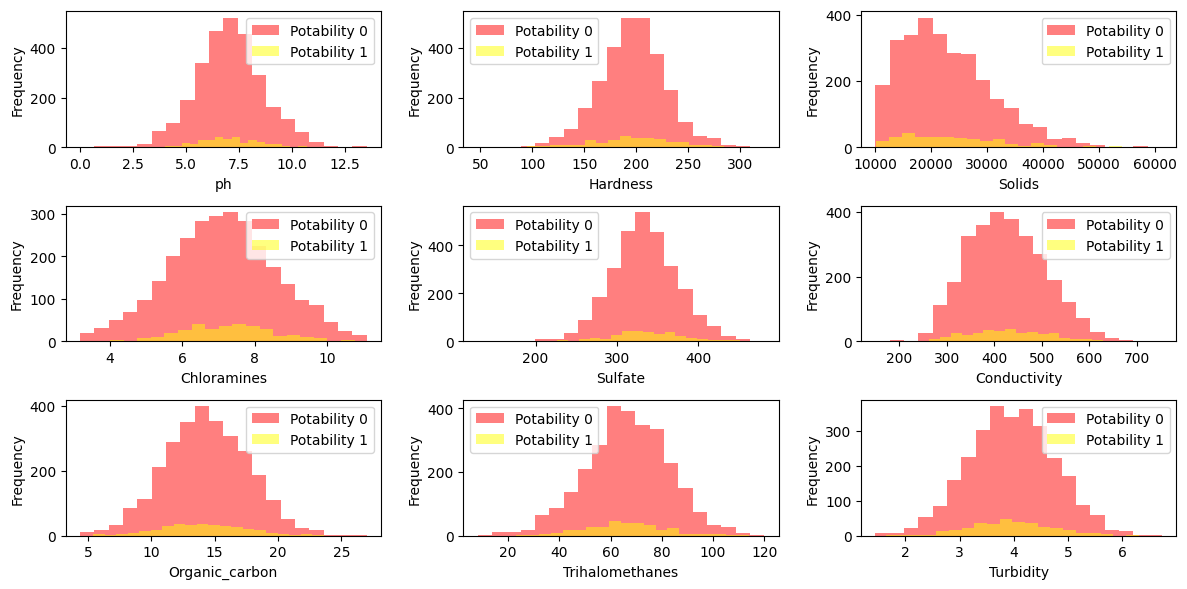

In [59]:
potable_0 = df2[df2['Potability'] == 0]
potable_1 = df2[df2['Potability'] == 1]
m = ['ph',"Hardness","Solids", "Chloramines", 'Sulfate',"Conductivity", "Organic_carbon",'Trihalomethanes', "Turbidity"]
# Create histograms for selected parameters
plt.figure(figsize=(12, 6))
for i in m:
    plt.subplot(3, 3, m.index(i) + 1)
    plt.hist(potable_0[i], bins=20, alpha=0.5, label='Potability 0', color='red')
    plt.hist(potable_1[i], bins=20, alpha=0.5, label='Potability 1', color='yellow')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.legend()
plt.tight_layout()
plt.show()

1. Water is highly potable within ph level 6 to 8
2. Water is highly potable within hardness level 150 to 200
3. Water is highly potable for Chloramines level from 6 to 8 ppm
4. Water is highly potable for Conductivity range between 400 to 500

In [60]:
df2.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000,3155.000000
mean,7.060539,196.196815,22983.827930,7.114561,334.219642,426.244162,14.300320,66.530621,3.959962,0.105230
std,1.575878,32.625522,8264.097091,1.456628,40.806601,80.863023,3.291863,16.201657,0.779251,0.306898
min,0.000000,47.430000,10039.530000,3.180000,129.000000,150.000000,4.370000,8.170000,1.450000,0.000000
25%,6.080000,176.910000,16663.565000,6.140000,307.857056,365.835000,12.075000,56.000000,3.430000,0.000000
50%,7.020000,196.900000,21689.630000,7.130000,333.084455,421.870000,14.230000,66.690000,3.940000,0.000000
75%,8.050000,216.415000,27829.200000,8.080000,360.258409,481.990000,16.570000,77.540000,4.500000,0.000000
max,13.540000,323.120000,61227.190000,11.080000,481.030642,753.340000,27.000000,120.030000,6.730000,1.000000


In [65]:
y = df2["Potability"].value_counts()

<Axes: ylabel='Potability'>

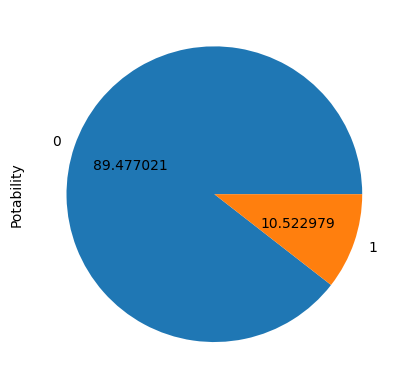

In [66]:
y.plot(kind = "pie", autopct = "%2f")


In [ ]:
#Imbalanced Data with 89% Not Potable Water and 10.5% Potable

In [67]:
#Heatmap

<Axes: >

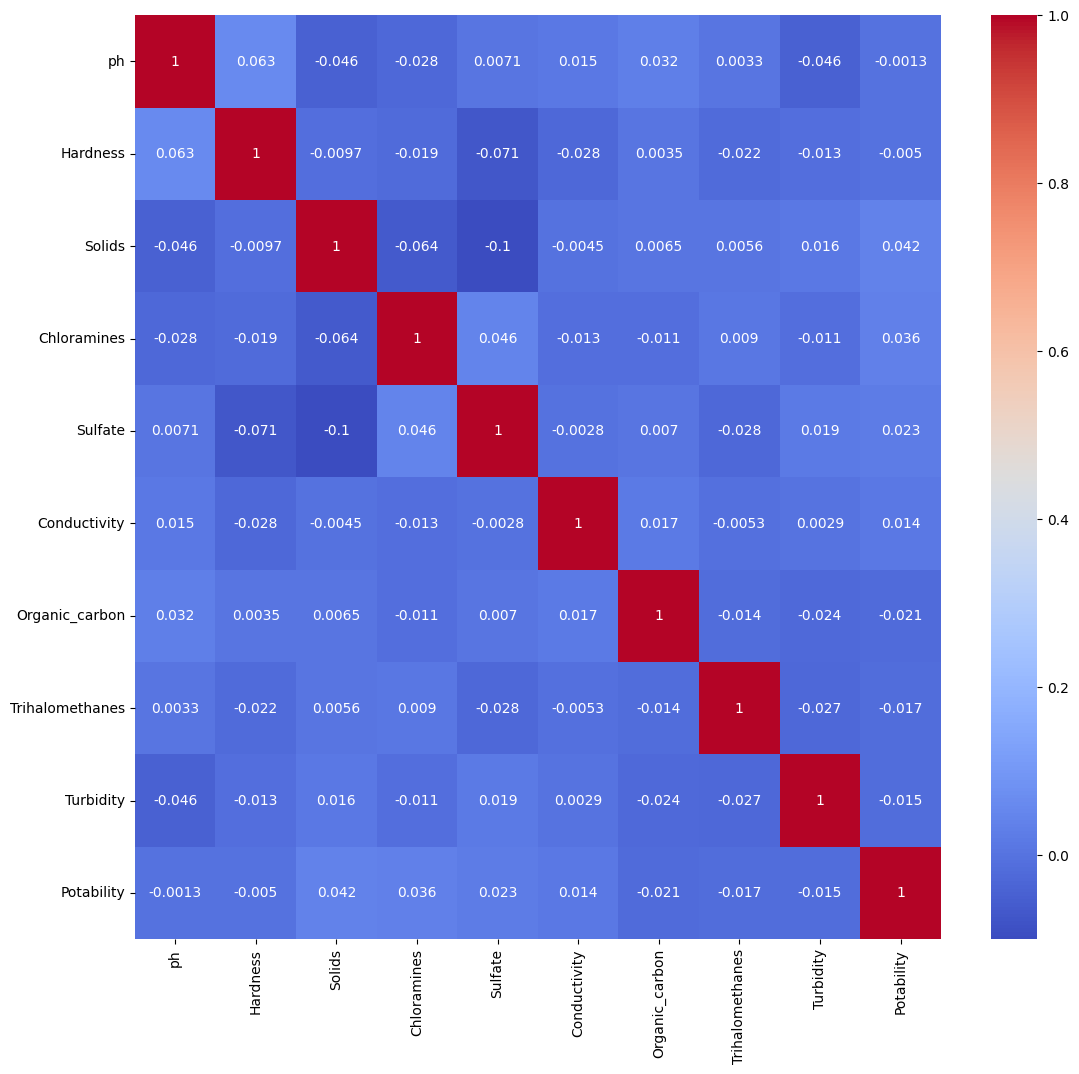

In [68]:
plt.figure(figsize = (13, 12))
sns.heatmap(df2.corr(), annot = True, cmap = "coolwarm")

In [ ]:
#No features are correlated to eachother or to the Target variable

In [ ]:
#Seperating the dependent and Independent features

In [69]:
X = df2.drop(["Potability"], axis = 1)
Y = df2["Potability"]

In [70]:
X.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [ ]:
#Model Performance and Selection

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [74]:
svc = SVC(kernel = "sigmoid", gamma = 1)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
ab = AdaBoostClassifier(n_estimators = 50, random_state = 2)
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gb = GradientBoostingClassifier(n_estimators = 2, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)
nb = GaussianNB()


In [75]:
clfa = {
    "SVC" :svc,
    "KN" : knc,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    "AB" : ab,
    "BC" : bc,
    "ETC" : etc,
    "GB" : gb,
    "XGB" : xgb,
    "NB" :nb,


}

In [76]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
  clf.fit(X_train, Y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  recall = recall_score(Y_test, y_pred)
  f1 = f1_score(Y_test, y_pred)
  return accuracy, precision, recall, f1

In [77]:
train_classifier(svc, X_train, Y_train, X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9270998415213946, 0.0, 0.0, 0.0)

In [78]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores =[]
for name, clf in clfa.items():
  current_accuracy, current_precision, current_recall, current_f1 = train_classifier(clf, X_train, Y_train, X_test, Y_test)
  print("For ", name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)
  print("Recall", current_recall)
  print("f1_score", current_f1)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)
  f1_scores.append(current_f1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy 0.9270998415213946
Precision 0.0
Recall 0.0
f1_score 0.0
For  KN
Accuracy 0.9223454833597464
Precision 0.0
Recall 0.0
f1_score 0.0
For  DT
Accuracy 0.9207606973058637
Precision 0.16666666666666666
Recall 0.021739130434782608
f1_score 0.03846153846153846


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  LR
Accuracy 0.9270998415213946
Precision 0.0
Recall 0.0
f1_score 0.0
For  RF
Accuracy 0.9286846275752774
Precision 0.6666666666666666
Recall 0.043478260869565216
f1_score 0.08163265306122448
For  AB
Accuracy 0.9239302694136292
Precision 0.0
Recall 0.0
f1_score 0.0
For  BC
Accuracy 0.919175911251981
Precision 0.2727272727272727
Recall 0.06521739130434782
f1_score 0.10526315789473684


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  ETC
Accuracy 0.9270998415213946
Precision 0.0
Recall 0.0
f1_score 0.0
For  GB
Accuracy 0.9270998415213946
Precision 0.0
Recall 0.0
f1_score 0.0
For  XGB
Accuracy 0.919175911251981
Precision 0.2727272727272727
Recall 0.06521739130434782
f1_score 0.10526315789473684
For  NB
Accuracy 0.9239302694136292
Precision 0.25
Recall 0.021739130434782608
f1_score 0.04


In [79]:
df_final = pd.DataFrame({"Algorithm":clfa.keys(), "Accuarcy":accuracy_scores, "Precision":precision_scores, "Recall":recall_scores, "f1_score":f1_scores}).sort_values("Precision", ascending = False)

In [80]:
df_final

,Algorithm,Accuarcy,Precision,Recall,f1_score
4,RF,0.928685,0.666667,0.043478,0.081633
6,BC,0.919176,0.272727,0.065217,0.105263
9,XGB,0.919176,0.272727,0.065217,0.105263
10,NB,0.923930,0.250000,0.021739,0.040000
2,DT,0.920761,0.166667,0.021739,0.038462
0,SVC,0.927100,0.000000,0.000000,0.000000
1,KN,0.922345,0.000000,0.000000,0.000000
3,LR,0.927100,0.000000,0.000000,0.000000
5,AB,0.923930,0.000000,0.000000,0.000000
7,ETC,0.927100,0.000000,0.000000,0.000000


In [81]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
X1, Y1 = sampler.fit_resample(X_train, Y_train)
from collections import Counter
print(sorted(Counter(Y1).items()))

[(0, 2238), (1, 2238)]


In [82]:
def train_classifier(clf, X1, Y1, X_test, Y_test):
  clf.fit(X1, Y1)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test, y_pred)
  precision = precision_score(Y_test, y_pred)
  recall = recall_score(Y_test, y_pred)
  f1 = f1_score(Y_test, y_pred)
  return accuracy, precision, recall, f1

In [83]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores =[]
for name, clf in clfa.items():
  current_accuracy, current_precision, current_recall, current_f1 = train_classifier(clf, X1, Y1, X_test, Y_test)
  print("For ", name)
  print("Accuracy", current_accuracy)
  print("Precision", current_precision)
  print("Recall", current_recall)
  print("f1_score", current_f1)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)
  recall_scores.append(current_recall)
  f1_scores.append(current_f1)

For  SVC
Accuracy 0.07290015847860538
Precision 0.07290015847860538
Recall 1.0
f1_score 0.1358936484490399
For  KN
Accuracy 0.7179080824088748
Precision 0.07692307692307693
Recall 0.2608695652173913
f1_score 0.11881188118811882
For  DT
Accuracy 0.4865293185419968
Precision 0.07878787878787878
Recall 0.5652173913043478
f1_score 0.13829787234042554
For  LR
Accuracy 0.5499207606973059
Precision 0.08098591549295775
Recall 0.5
f1_score 0.1393939393939394
For  RF
Accuracy 0.9239302694136292
Precision 0.4
Recall 0.08695652173913043
f1_score 0.14285714285714285
For  AB
Accuracy 0.659270998415214
Precision 0.09569377990430622
Recall 0.43478260869565216
f1_score 0.1568627450980392
For  BC
Accuracy 0.919175911251981
Precision 0.3333333333333333
Recall 0.10869565217391304
f1_score 0.16393442622950818
For  ETC
Accuracy 0.9286846275752774
Precision 1.0
Recall 0.021739130434782608
f1_score 0.042553191489361694
For  GB
Accuracy 0.41679873217115687
Precision 0.09137055837563451
Recall 0.782608695652174

In [84]:
df_final = pd.DataFrame({"Algorithm":clfa.keys(), "Accuarcy":accuracy_scores, "Precision":precision_scores, "Recall":recall_scores, "f1_score":f1_scores}).sort_values("Precision", ascending = False)

In [85]:
df_final

,Algorithm,Accuarcy,Precision,Recall,f1_score
7,ETC,0.928685,1.000000,0.021739,0.042553
4,RF,0.923930,0.400000,0.086957,0.142857
6,BC,0.919176,0.333333,0.108696,0.163934
10,NB,0.648177,0.114035,0.565217,0.189781
5,AB,0.659271,0.095694,0.434783,0.156863
8,GB,0.416799,0.091371,0.782609,0.163636
9,XGB,0.881141,0.085714,0.065217,0.074074
3,LR,0.549921,0.080986,0.500000,0.139394
2,DT,0.486529,0.078788,0.565217,0.138298
1,KN,0.717908,0.076923,0.260870,0.118812


In [ ]:
#Best Model Analysis

In [97]:
rfc.fit(X1, Y1)

RandomForestClassifier(n_estimators=50, random_state=2)

In [98]:
X_train_pred = rfc.predict(X1)
train_acc = accuracy_score(X_train_pred, Y1)

In [99]:
print('Accuracy score of the training data : ', train_acc)

Accuracy score of the training data :  1.0


In [100]:
# accuracy score on the test data
X_test_prediction = rfc.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [101]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9239302694136292


In [102]:
input_data = (3.71,204.89,20791.31,7.30,368.516441,564.30,10.37,86.99,2.96)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Water Not Potable')
else:
  print('Water is potable')

[0]
Water Not Potable


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [103]:
input_data = (4.668101687,	193.6817355,	47580.9916,	7.166638935,	359.948574,	526.4241709,	13.89441852,	66.68769479,	4.43582091)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rfc.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Water Not Potable')
else:
  print('Water is potable')

[1]
Water is potable


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#Code for Streamlit Web app

In [104]:
import pickle

In [105]:
filename = "water_model.pkl"

In [106]:
pickle.dump(rfc, open(filename, "wb"))

In [107]:
load_model = pickle.load(open("water_model.pkl", "rb"))